In [1]:
library('Seurat')

library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('readr')

library('gghighlight')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
load('../data/all_ab.Rdata')

ls()

[1] "all_ab"

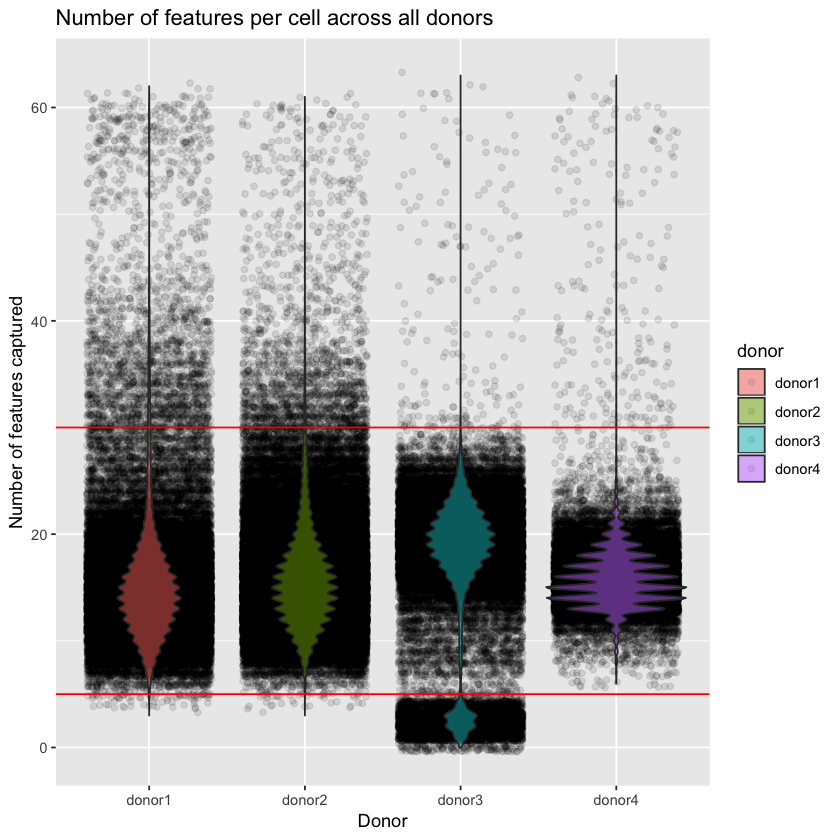

In [3]:
tibble(
    `donor`=all_ab[['orig.ident']] %>% unlist %>% as.factor,
    `percent_mt`=all_ab[['nFeature_RNA']] %>% unlist
) %>%
ggplot(aes(x=`donor`, y=`percent_mt`, fill=`donor`)) +
    geom_jitter(alpha=.1) +
    geom_violin(alpha=.5) +
    geom_hline(yintercept=5, color="red") +
    geom_hline(yintercept=30, color="red") +
    labs(
        x='Donor',
        y='Number of features captured',
        title='Number of features per cell across all donors'
    )
    

In [4]:
all_ab_filtered <-
    subset(
        all_ab,
        subset=nFeature_RNA > 5 & nFeature_RNA < 40
    )

In [5]:
all_ab_filtered <- NormalizeData(all_ab_filtered)

In [6]:
all_ab_filtered <- FindVariableFeatures(all_ab_filtered, selection.method = "vst", nfeatures=64)
top64 <- head(VariableFeatures(all_ab_filtered), 64)
top64

[1] "FLRGRAYGL-EBNA-3A-EBV"              "RTLNAWVKV-Gag-protein-HIV"         
 [3] "FLYALALLL-LMP2A-EBV"                "LLDFVRFMGV-EBNA-3B-EBV"            
 [5] "GLCTLVAML-BMLF1-EBV"                "GILGFVFTL-Flu-MP-Influenza"        
 [7] "YLLEMLWRL-LMP1-EBV"                 "AVFDRKSDAK-EBNA-3B-EBV"            
 [9] "IMDQVPFSV-gp100-Cancer"             "CCR7-TotalSeqC"                    
[11] "IVTDFSVIK-EBNA-3B-EBV"              "ELAGIGILTV-MART-1-Cancer"          
[13] "HLA-DR-TotalSeqC"                   "CD45RA-TotalSeqC"                  
[15] "LLFGYPVYV-HTLV-1"                   "MLDLQPETT-16E7-HPV"                
[17] "SLFNTVATLY-Gag-protein-HIV"         "AYAQKIFKI-IE-1-CMV"                
[19] "RPPIFIRRL-EBNA-3A-EBV"              "IPSINVHHY-pp65-CMV"                
[21] "CLLWSFQTSA-Tyrosinase-Cancer"       "IgG2b-TotalSeqC"                   
[23] "RAKFKQLL-BZLF1-EBV"                 "CLGGLLTMV-LMP-2A-EBV"              
[25] "SLYNTVATLY-Gag-protein-HIV"         "CD127-TotalSeqC"                   
[27] "QPRAPIRPI-EBNA-6-EBV"               "CD4-TotalSeqC"                     
[29] "CD19-TotalSeqC"                     "YLNDHLEPWI-BCL-X-Cancer"           
[31] "CD8a-TotalSeqC"                     "SLEGGGLGY-NC"                      
[33] "RMFPNAPYL-WT-1"                     "IgG2a-TotalSeqC"                   
[35] "CYTWNQMNL-WT1-(235-243)236M-Y"      "SLLMWITQV-NY-ESO-1-Cancer"         
[37] "FLASKIGRLV-Ca2-indepen-Plip-A2"     "QYDPVAALF-pp65-CMV"                
[39] "LLMGTLGIVC-HPV-16E7-82-91"          "ILKEPVHGV-RT-HIV"                  
[41] "KTWGQYWQV-gp100-Cancer"             "AYSSAGASI-NC"                      
[43] "SLFNTVATL-Gag-protein-HIV"          "ELRRKMMYM-IE-1-CMV"                
[45] "ALIAPVHAV-NC"                       "RPHERNGFTVL-pp65-CMV"              
[47] "RLRAEAQVK-EMNA-3A-EBV"              "GPAESAAGL-NC"                      
[49] "AAKGRGAAL-NC"                       "CLLGTYTQDV-Kanamycin-B-dioxygenase"
[51] "CD3-TotalSeqC"                      "KLQCVDLHV-PSA146-154"              
[53] "TPRVTGGGAM-pp65-CMV"                "CD14-TotalSeqC"                    
[55] "KVAELVHFL-MAGE-A3-Cancer"           "CD45RO-TotalSeqC"                  
[57] "KVLEYVIKV-MAGE-A1-Cancer"           "IgG1-TotalSeqC"                    
[59] "PD-1-TotalSeqC"                     "KLGGALQAK-IE-1-CMV"                
[61] "VTEHDTLLY-IE-1-CMV"                 "RIAAWMATY-BCL-2L1-Cancer"          
[63] "STEGGGLAY-NC"                       "NLVPMVATV-pp65-CMV"

When using repel, set xnudge and ynudge to 0 for optimal results


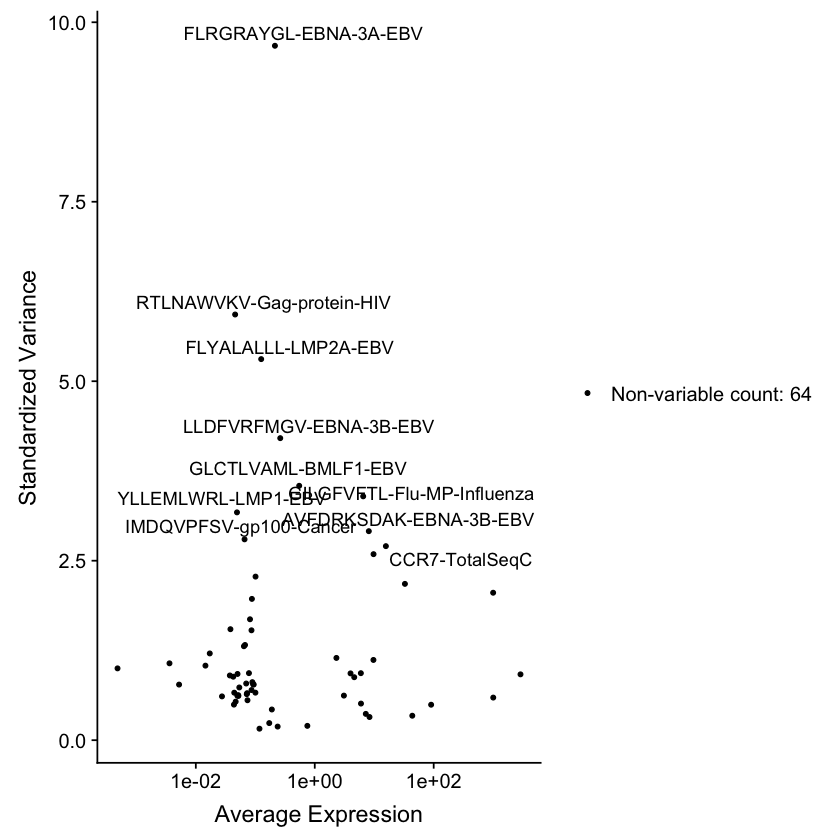

In [7]:
LabelPoints(plot = VariableFeaturePlot(all_ab_filtered), points = head(top64, n=10), repel = TRUE)

In [8]:
all_ab_filtered <- ScaleData(all_ab_filtered)

Centering and scaling data matrix


In [9]:
all_ab_filtered <- RunPCA(all_ab_filtered, features=VariableFeatures(object=all_ab_filtered))


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”

PC_ 1 
Positive:  IVTDFSVIK-EBNA-3B-EBV, RLRAEAQVK-EMNA-3A-EBV, KLGGALQAK-IE-1-CMV, AVFDRKSDAK-EBNA-3B-EBV, RIAAWMATY-BCL-2L1-Cancer, STEGGGLAY-NC, HLA-DR-TotalSeqC, VTEHDTLLY-IE-1-CMV, KVLEYVIKV-MAGE-A1-Cancer, PD-1-TotalSeqC 
	   IgG1-TotalSeqC, CD14-TotalSeqC, CD45RO-TotalSeqC, CD19-TotalSeqC, LLDFVRFMGV-EBNA-3B-EBV, IgG2a-TotalSeqC, KTWGQYWQV-gp100-Cancer, CD4-TotalSeqC, CCR7-TotalSeqC, NLVPMVATV-pp65-CMV 
	   SLLMWITQV-NY-ESO-1-Cancer, KLQCVDLHV-PSA146-154, IgG2b-TotalSeqC, LLFGYPVYV-HTLV-1, ALIAPVHAV-NC, QYDPVAALF-pp65-CMV, ILKEPVHGV-RT-HIV, QPRAPIRPI-EBNA-6-EBV, IMDQVPFSV-gp100-Cancer, IPSINVHHY-pp65-CMV 
Negative:  CD45RA-TotalSeqC, CD3-TotalSeqC, GILGFVFTL-Flu-MP-Influenza, RAKFKQLL-BZLF1-EBV, CD127-TotalSeqC, GLCTLVAML-BMLF1-EBV, CLGGLLTMV-LMP-2A-EBV, LLMGTLGIVC-HPV-16E7-82-91, SLYNTVATLY-Gag-protein-HIV, SLFNTVATLY-Gag-protein-HIV 
	   CLLWSFQTSA-Tyrosinase-Cancer, FLYALALLL-LMP2A-EBV, CLLGTYTQDV-Kanamycin-B-dioxygenase, RPHERNGFTVL-pp65-CMV, SLEGGGLGY-NC, SLFNTVATL-Gag-prot

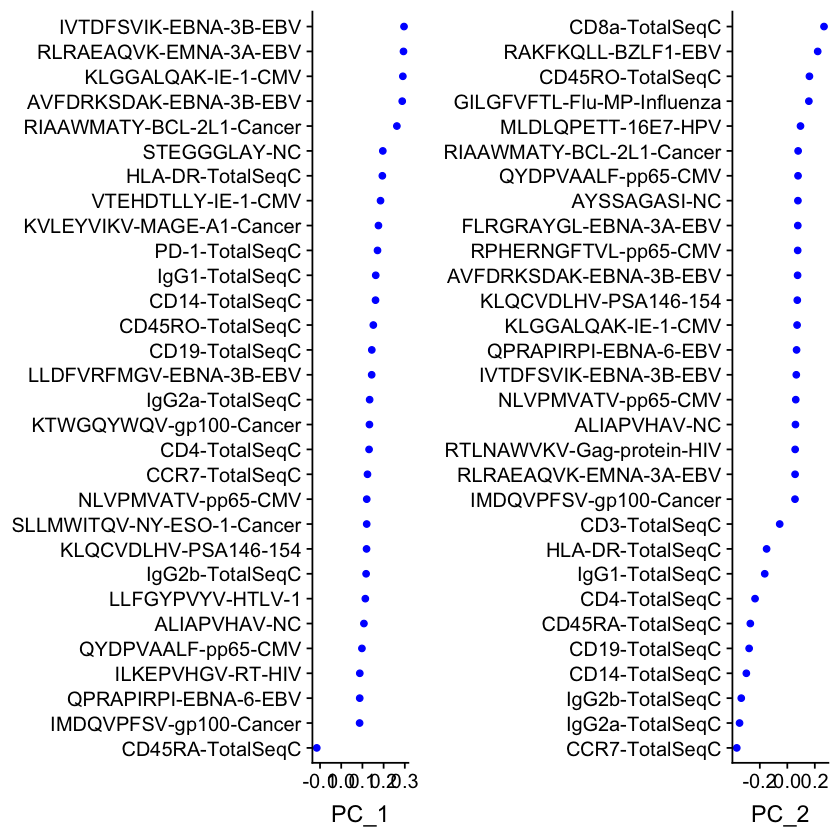

In [10]:
VizDimLoadings(all_ab_filtered, dims=1:2, reduction="pca", ncol=2)


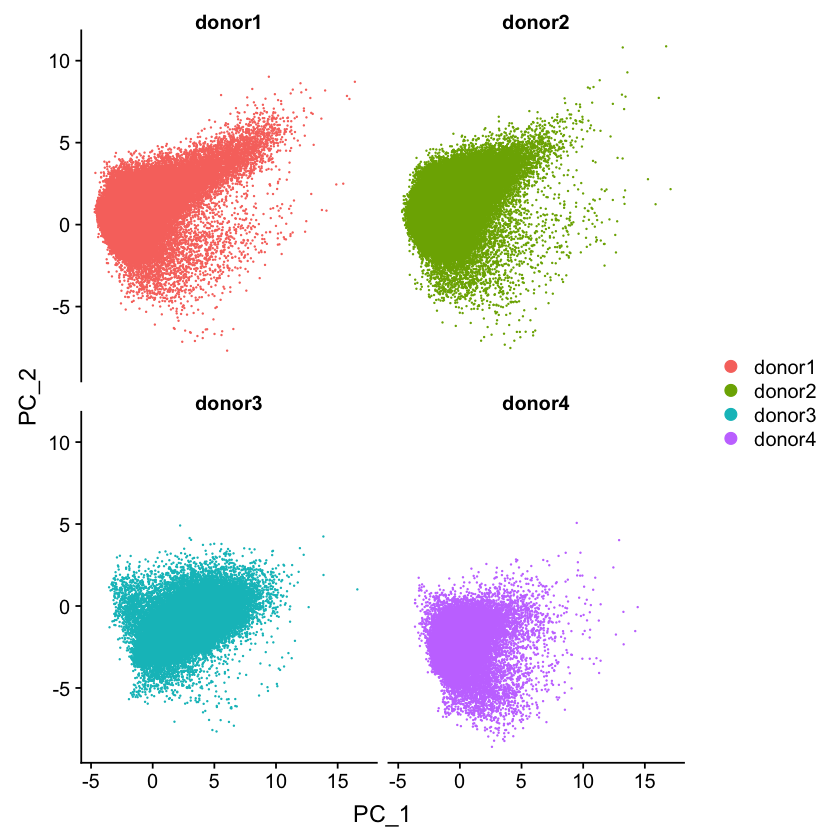

In [11]:
DimPlot(all_ab_filtered, reduction="pca", split.by="orig.ident")

In [12]:
save(
    file="../data/all_ab-processed.Rdata",
    all_ab_filtered
)